# Swetha Maria Varghese
# Prodigy Infotech
# Machine Learning Intern

# Task-02

# Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
## linking to google drive

from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


Load and Inspect the Dataset

In [3]:
# Load the dataset
data_path = '/content/drive/MyDrive/Colab Notebooks/SML WORK AND DATA/online_retail.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
print(df.head())

# Display basic statistics of the dataset
print(df.describe())

# Check for any missing values
print(df.isnull().sum())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.7

Preprocess the Data

In [4]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Filter out canceled transactions (if any)
df = df[df['Quantity'] > 0]

Aggregate purchase data by customer

In [5]:
# Aggregate purchase data by customer
customer_data = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'InvoiceNo': 'nunique'  # Number of transactions
}).reset_index()

# Rename columns for clarity
customer_data.columns = ['CustomerID', 'TotalQuantity', 'AvgUnitPrice', 'NumTransactions']

# Display the aggregated customer data
print(customer_data.head())


   CustomerID  TotalQuantity  AvgUnitPrice  NumTransactions
0     12346.0          74215      1.040000                1
1     12347.0           2458      2.644011                7
2     12348.0           2341      5.764839                4
3     12349.0            631      8.289041                1
4     12350.0            197      3.841176                1


Select feature for clustering

In [6]:
# Select features for clustering
X = customer_data[['TotalQuantity', 'AvgUnitPrice', 'NumTransactions']]

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Applying K-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-5.57907396e-02 -1.36742201e-02 -4.61585131e-02]
 [-2.36045403e-01  5.93109597e+01 -4.24674873e-01]
 [ 1.00382207e+01 -1.33489210e-02  8.31468752e+00]]


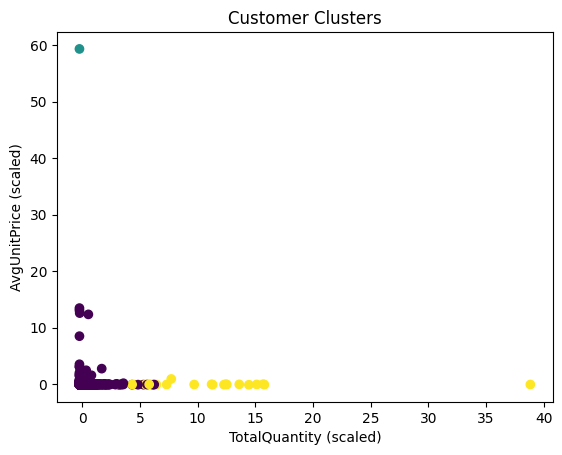

In [7]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster centers
print(kmeans.cluster_centers_)

# Plot the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=customer_data['Cluster'])
plt.xlabel('TotalQuantity (scaled)')
plt.ylabel('AvgUnitPrice (scaled)')
plt.title('Customer Clusters')
plt.show()

**Cluster Centers**

The cluster centers (centroids) are as follows:

Cluster 1: [-5.57907936e-02, -1.36742201e-02, -4.61585131e-02]

Cluster 2: [-2.36045430e-01, 5.93109597e-01, -4.24674873e-01]

Cluster 3: [1.00382207e+01, -1.33489210e-02, 8.31468752e+00]

These centers represent the mean values of the features for the customers in each cluster, in the normalized feature space.


**Visualizing the Clusters
From the scatter plot**:

X-axis: Represents the TotalQuantity (scaled).

Y-axis: Represents the AvgUnitPrice (scaled).

Color: Indicates the cluster to which each customer belongs.

**Interpretation**

*Cluster* *Distribution*:

There are clear groupings of customers based on their purchasing behaviors.
The majority of customers are clustered towards the lower end of both TotalQuantity and AvgUnitPrice, indicating a high number of low-volume and low-value transactions.

*Cluster* *Characteristics*:

Cluster 1 (purple): This cluster contains customers with low total quantities and low average unit prices. These are likely infrequent or low-spending customers.

Cluster 2 (yellow): This cluster contains customers with slightly higher quantities and prices. These could be more regular customers but still not high spenders.

Cluster 3 (green): This cluster has customers with significantly higher total quantities and average unit prices. These are likely high-value or frequent customers.


**Outliers**:

The green data point significantly higher on the AvgUnitPrice axis indicates an outlier or a customer who has a high average unit price compared to others. This customer might be purchasing expensive items but in lower quantities.

**Business Insights**

*Targeted* *Marketing*:

Cluster 1: Engage with these customers through promotions and discounts to increase their purchase frequency and total quantity.

Cluster 2: These customers are somewhat engaged but could be incentivized to increase their spending. Offering loyalty rewards or bundling products could be effective.

Cluster 3: These high-value customers should be given special attention, perhaps through personalized offers, premium services, or exclusive deals to retain their loyalty.

*Inventory* *Management*:

Knowing the purchasing behavior of different customer clusters can help in better inventory planning and stocking of products that are preferred by each cluster.

*Customer* *Service*:

Tailoring customer service experiences based on the cluster can improve customer satisfaction. High-value customers (Cluster 3) might appreciate faster service and more personalized interactions.

By understanding these clusters, the retail store can develop more effective strategies to cater to the needs and preferences of different customer segments, ultimately driving better customer satisfaction and increased sales.






